# This file allows one to set parameters and then create a LON transition matrix

In [4]:
##Import packages and files
from itertools import compress, product
import numpy as np
import matplotlib.pyplot as plt
import array
import random
import pandas as pd
import itertools
import operator
import importlib
#import functions defining the layered landscape
from LayeredLandscapeFunctions import *
from Landscapes import *
import networkx as nx


In [2]:
##First define a landscape, then notice all the maximas (it prinds the number of maxima)
NKLand1 = make_NK_land(N=7,K=1)
DFWithMaximas = Local_Maxima_Locations(NKLand1)
DFWithMaximas

4


,Fitness,Location,Maxima
0000000,0.495108,"(0, 0, 0, 0, 0, 0, 0)",0
0000001,0.559525,"(0, 0, 0, 0, 0, 0, 1)",0
0000010,0.708584,"(0, 0, 0, 0, 0, 1, 0)",0
0000011,0.620365,"(0, 0, 0, 0, 0, 1, 1)",0
0000100,0.574915,"(0, 0, 0, 0, 1, 0, 0)",0
...,...,...,...
1111011,0.456241,"(1, 1, 1, 1, 0, 1, 1)",0
1111100,0.464178,"(1, 1, 1, 1, 1, 0, 0)",0
1111101,0.494569,"(1, 1, 1, 1, 1, 0, 1)",0
1111110,0.606449,"(1, 1, 1, 1, 1, 1, 0)",0


In [3]:
##Creates a matrix of local optima transistions
##Also this is modified in that we go through all the positions in a local search.
#M is the number of neighbors to search over,
#D is the pertubration size
def Make_Lon(DF_Landscape, M, D, Num_Perturbs):
    
    ##First get a list of all the Maxima locations
    DFMaximas = DF_Landscape[DF_Landscape.Maxima==1].index.values
    df = pd.DataFrame(data=None, index=DF_Landscape[DF_Landscape.Maxima==1].index.values, columns=DF_Landscape[DF_Landscape.Maxima==1].index.values,
                 dtype=None, copy=False)
    df = df.fillna(0) #replace nas with zeros

    #loop through every maxima
    for Maxima in DFMaximas:
        s_star=Maxima #set currrent s_star
        i=0
        while(i<Num_Perturbs):
            s_prime = Perturbation(s_star, D) #perturb
            s_prime_star = Hill_Climb_First(s_prime,DF_Landscape, M)  #climb new hill, here find first maxima
            #update the transition matrix
            df.at[s_star, s_prime_star] =  df.at[s_star, s_prime_star]+1 
            
            i = i + 1
    return(df)


In [9]:
##create the transition matrix
LONMatrix = Make_Lon(DFWithMaximas,M = 1,D = 2,Num_Perturbs = 100)

In [15]:
MarkovMatrix = run(LONMatrix)
MarkovMatrix
LONMatrix

In [96]:
df = pd.read_csv('N-10_K=8_I=3.csv')
df = df.set_index('Unnamed: 0')#reset index


In [97]:
Mat = Markov_Clustering(df)

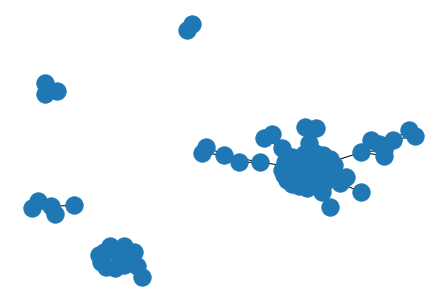

In [98]:
#set node size based upon some scaling of the fitness
MarkClsuMatrix = nx.from_numpy_matrix(Mat) #convert to adjacency matrix undirected

nx.draw(MarkClsuMatrix, with_labels=False,arrows=True)



In [36]:
MarkClsuMatrix


In [17]:
NewDF = df[df.div(df.sum(axis=1), axis=0)>0.05]
NewDF = NewDF.fillna(0) #replace nas with zeros


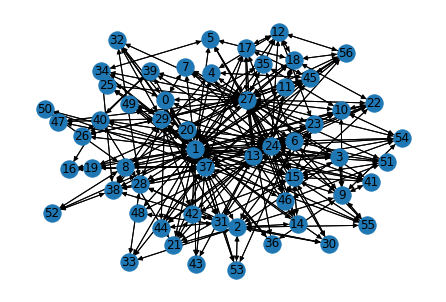

In [82]:
#set node size based upon some scaling of the fitness
NewMat = nx.from_numpy_matrix(NewDF.to_numpy()) #convert to adjacency matrix undirected
NewMat = nx.DiGraph(NewMat) #convert to directed graph (digraph)

nx.draw(NewMat, 
        with_labels=True,arrows=True)



In [20]:
sub_graphs = nx.connected_components_subgraph(MarkClsuMatrix)

     #n gives the number of sub graphs
#n = len(sub_graphs)

     # you can now loop through all nodes in each sub graph
#for i in range(n):
#    print "Subgraph:", i, "consists of ",sub_graphs[i].nodes()

AttributeError: module 'networkx' has no attribute 'connected_components_subgraph'

In [21]:
sub_graphs

NameError: name 'sub_graphs' is not defined

In [22]:
list(nx.connected_component_subgraphs(MarkClsuMatrix))

AttributeError: module 'networkx' has no attribute 'connected_component_subgraphs'

In [23]:
(MarkClsuMatrix.connected_component_subgraphs())

AttributeError: 'Graph' object has no attribute 'connected_component_subgraphs'

In [24]:
nx.number_connected_components(MarkClsuMatrix)

3

In [35]:
Components = nx.connected_components(MarkClsuMatrix)

In [80]:
#set node size based upon some scaling of the fitness
MarkClsuMatrix = nx.from_numpy_matrix(Mat) #convert to adjacency matrix undirected
Comp = nx.from_numpy_matrix(Components) #convert to adjacency matrix undirected

nx.draw(MarkClsuMatrix, with_labels=Comp,arrows=True)



AttributeError: 'generator' object has no attribute 'shape'

AttributeError: 'set' object has no attribute 'edges'

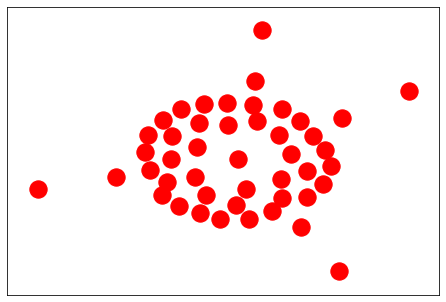

In [55]:
pos = nx.spring_layout(MarkClsuMatrix)
colorlist = [ 'r', 'g', 'b', 'c', 'm', 'y', 'k' ]
wcc = nx.connected_components(MarkClsuMatrix)
for index, sg in enumerate(wcc):  #there's probably a more elegant approach using zip
    nx.draw(sg, pos = pos, node_color = colorlist[index])

In [57]:
Kale = sorted(nx.connected_components(MarkClsuMatrix), key = len, reverse=True)

In [60]:
Kale[2]

{3, 24, 30, 41, 51}

TypeError: float() argument must be a string or a number, not 'dict'

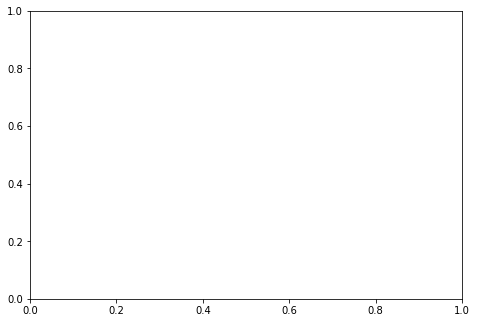

In [74]:
MarkClsuMatrix = nx.from_numpy_matrix(Mat) #convert to adjacency matrix undirected

nx.draw(MarkClsuMatrix, with_labels=False,arrows=True,
        node_color = nx.greedy_color(MarkClsuMatrix, strategy='connected_sequential_bfs', interchange=True))



In [66]:
for i in Kale:
    

In [79]:
 nx.from_dict(nx.greedy_color(MarkClsuMatrix, strategy='connected_sequential', interchange=False))

AttributeError: module 'networkx' has no attribute 'from_dict'